In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import chart_studio.plotly
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression

In [2]:
ufc = pd.read_csv(os.path.join("clean.csv"))
ufc.head()

,Unnamed: 0,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,Red Impact Score,winner
0,0,1,1,23,182,2783,84,0,1,1,...,0,0,0,0,0,0,0,0,16453,red
1,1,0,0,32,175,2208,70,0,0,0,...,0,0,0,0,0,0,0,0,0,blue
2,2,2,0,38,172,721,70,0,0,0,...,0,0,0,0,0,0,0,0,4204,red
3,3,0,0,23,170,2825,56,0,0,0,...,0,0,0,0,0,0,0,0,21384,blue
4,4,3,1,30,167,2260,61,0,0,0,...,0,0,0,0,0,0,0,0,15454,red


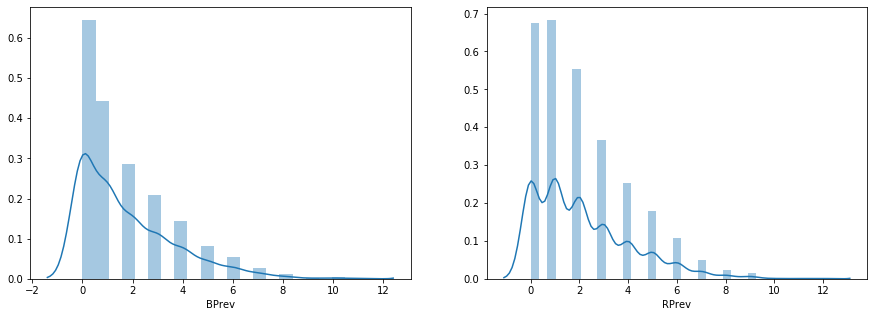

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(ufc.BPrev, ax=ax[0])
sns.distplot(ufc.RPrev, ax=ax[1])

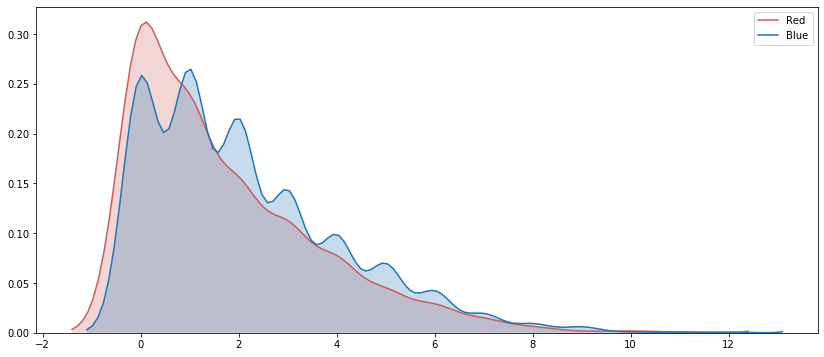

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(ufc.BPrev, shade=True, color='indianred', label='Red')
sns.kdeplot(ufc.RPrev, shade=True, label='Blue')

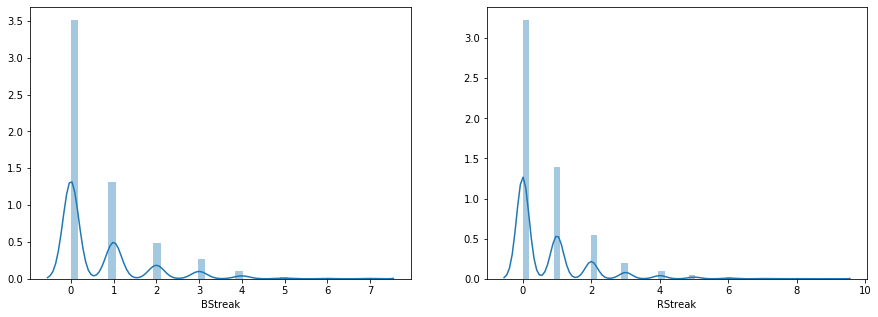

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(ufc.BStreak, ax=ax[0])
sns.distplot(ufc.RStreak, ax=ax[1])

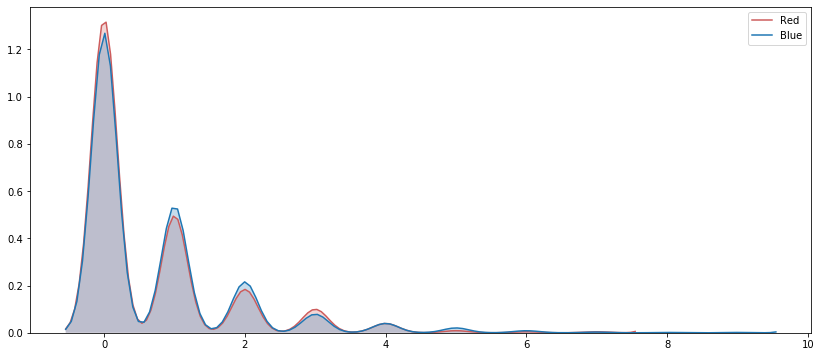

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(ufc.BStreak, shade=True, color='indianred', label='Red')
sns.kdeplot(ufc.RStreak, shade=True, label='Blue')

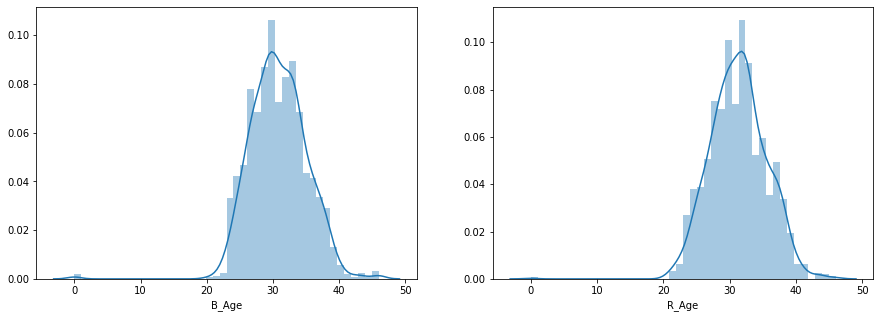

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(ufc.B_Age, ax=ax[0])
sns.distplot(ufc.R_Age, ax=ax[1])

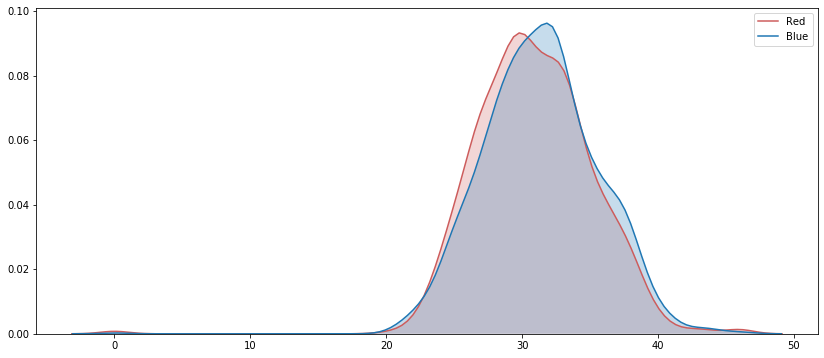

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(ufc.B_Age, shade=True, color='indianred', label='Red')
sns.kdeplot(ufc.R_Age, shade=True, label='Blue')

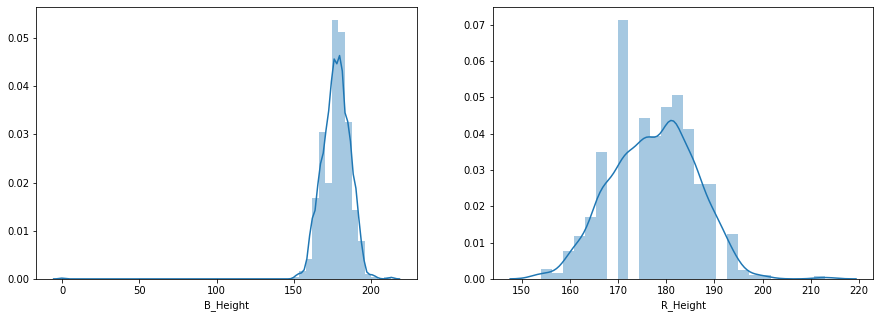

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(ufc.B_Height, ax=ax[0])
sns.distplot(ufc.R_Height, ax=ax[1])

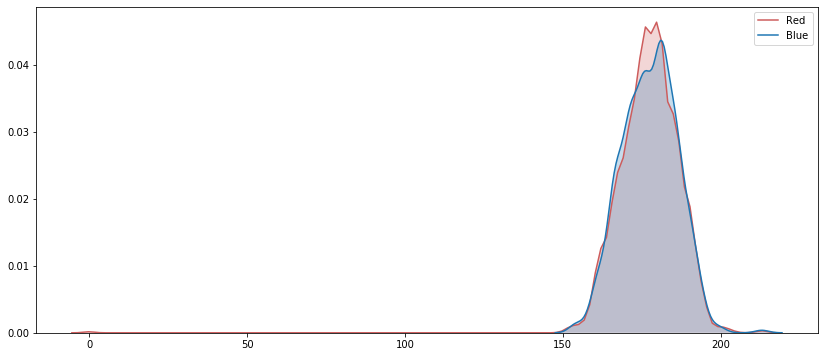

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(ufc.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(ufc.R_Height, shade=True, label='Blue')

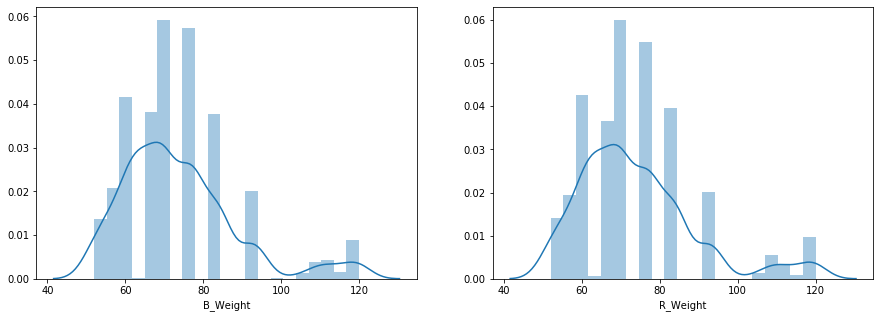

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(ufc.B_Weight, ax=ax[0])
sns.distplot(ufc.R_Weight, ax=ax[1])

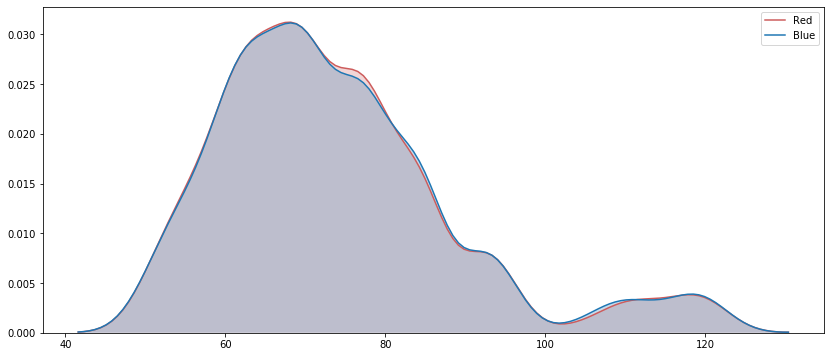

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(ufc.B_Weight, shade=True, color='indianred', label='Red')
sns.kdeplot(ufc.R_Weight, shade=True, label='Blue')

In [13]:
BPrev = ufc.groupby(['BPrev']).count()['winner']
BluePrev = BPrev.sort_values(axis=0, ascending=False)
BluePrev.head(10)

BPrev
0     499
1     342
2     221
3     162
4     112
5      63
6      42
7      21
8       9
10      3
Name: winner, dtype: int64

In [14]:
RPrev = ufc.groupby(['RPrev']).count()['winner']
RedPrev = RPrev.sort_values(axis=0, ascending=False)
RedPrev.head(10)

RPrev
1    346
0    342
2    281
3    186
4    128
5     91
6     55
7     25
8     12
9      8
Name: winner, dtype: int64

Text(0.5, 1.0, 'Previous Fights by Red and Blue fighters')

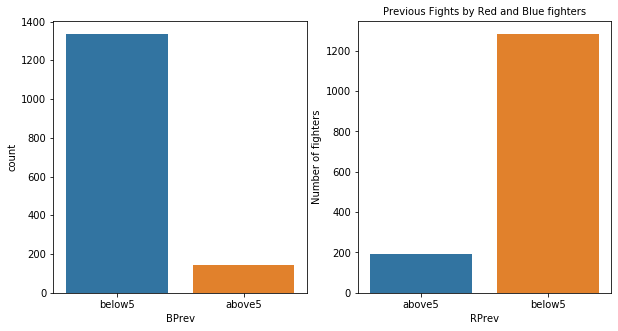

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x =['above5' if i >= 5 else 'below5' for i in ufc.BPrev]
ufc_B = pd.DataFrame({'BPrev':x})
sns.countplot(x=ufc_B.BPrev, ax=ax[0])

y =['above5' if i >= 5 else 'below5' for i in ufc.RPrev]
ufc_R = pd.DataFrame({'RPrev':y})
sns.countplot(x=ufc_R.RPrev, ax=ax[1])
plt.ylabel('Number of fighters')
plt.title('Previous Fights by Red and Blue fighters', loc='center', fontsize=10)


In [16]:
BStreak = ufc.groupby(['BStreak']).count()['winner']
BlueStreak = BStreak.sort_values(axis=0, ascending=False)
BlueStreak.head(10)

BStreak
0    908
1    338
2    124
3     68
4     27
5      6
7      3
6      3
Name: winner, dtype: int64

In [17]:
RStreak = ufc.groupby(['RStreak']).count()['winner']
RedStreak = RStreak.sort_values(axis=0, ascending=False)
RedStreak.head(10)

RStreak
0    858
1    369
2    145
3     54
4     27
5     14
6      6
7      2
9      1
8      1
Name: winner, dtype: int64

Text(0.5, 1.0, 'Streaks by Red and Blue fighters')

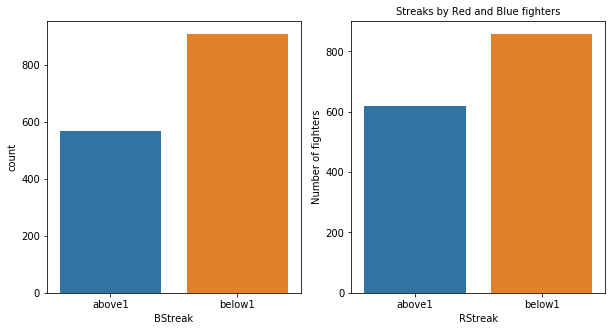

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x =['above1' if i >=1  else 'below1' for i in ufc.BStreak]
ufc_B = pd.DataFrame({'BStreak':x})
sns.countplot(x=ufc_B.BStreak, ax=ax[0])

y =['above1' if i >=1 else 'below1' for i in ufc.RStreak]
ufc_R = pd.DataFrame({'RStreak':y})
sns.countplot(x=ufc_R.RStreak, ax=ax[1])
plt.ylabel('Number of fighters')
plt.title('Streaks by Red and Blue fighters', loc='center', fontsize=10)

In [19]:
BAge = ufc.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

B_Age
30    164
33    138
29    134
32    128
27    120
31    112
34    106
28    106
26     72
35     67
Name: winner, dtype: int64

In [20]:
RAge = ufc.groupby(['R_Age']).count()['winner']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge.head(10)

R_Age
32    169
30    156
33    141
28    116
31    114
29    111
35     92
34     81
27     78
37     76
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of Red and Blue fighters')

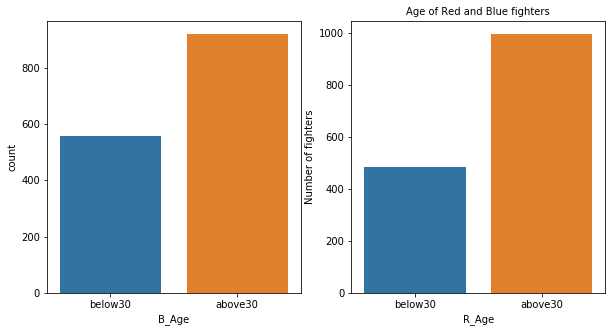

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x =['above30' if i >=30  else 'below30' for i in ufc.B_Age]
ufc_B = pd.DataFrame({'B_Age':x})
sns.countplot(x=ufc_B.B_Age, ax=ax[0])

y =['above30' if i >=30 else 'below30' for i in ufc.R_Age]
ufc_R = pd.DataFrame({'R_Age':y})
sns.countplot(x=ufc_R.R_Age, ax=ax[1])
plt.ylabel('Number of fighters')
plt.title('Age of Red and Blue fighters', loc='center', fontsize=10)

In [22]:
BHeight = ufc.groupby(['B_Height']).count()['winner']
BlueHeight = BHeight.sort_values(axis=0, ascending=False)
BlueHeight.head(10)

B_Height
177    183
180    164
182    159
175    155
172    125
185    106
170    100
187     99
167     92
190     90
Name: winner, dtype: int64

In [23]:
RHeight = ufc.groupby(['R_Height']).count()['winner']
RedHeight = RHeight.sort_values(axis=0, ascending=False)
RedHeight.head(10)

R_Height
182    170
180    159
175    149
172    140
185    138
177    132
167    117
170     99
190     88
187     88
Name: winner, dtype: int64

Text(0.5, 1.0, 'Height of Red and Blue fighters')

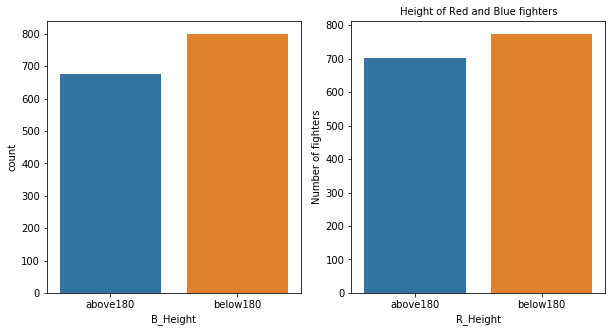

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x =['above180' if i >=180  else 'below180' for i in ufc.B_Height]
ufc_B = pd.DataFrame({'B_Height':x})
sns.countplot(x=ufc_B.B_Height, ax=ax[0])

y =['above180' if i >=180 else 'below180' for i in ufc.R_Height]
ufc_R = pd.DataFrame({'R_Height':y})
sns.countplot(x=ufc_R.R_Height, ax=ax[1])
plt.ylabel('Number of fighters')
plt.title('Height of Red and Blue fighters', loc='center', fontsize=10)

In [25]:
BWeight = ufc.groupby(['B_Weight']).count()['winner']
BlueWeight = BWeight.sort_values(axis=0, ascending=False)
BlueWeight = pd.DataFrame(BlueWeight).reset_index()
BlueWeight

,B_Weight,winner
0,70,283
1,77,274
2,61,199
3,65,183
4,84,180
5,56,99
6,93,96
7,52,66
8,120,25
9,109,16


In [26]:
RWeight = ufc.groupby(['R_Weight']).count()['winner']
RedWeight = RWeight.sort_values(axis=0, ascending=False)
RedWeight = pd.DataFrame(RedWeight).reset_index()
RedWeight

,R_Weight,winner
0,70,287
1,77,262
2,61,204
3,84,189
4,65,175
5,93,96
6,56,93
7,52,68
8,109,23
9,120,23


C:\Users\Nell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Nell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Nell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Nell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Nell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


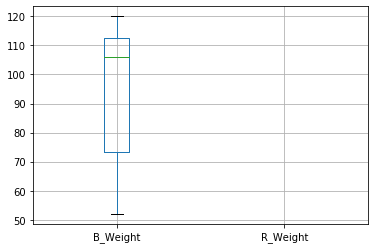

In [27]:
#box and whisker plot for blue weight-- ERROR, Do not use
df = pd.DataFrame(BlueWeight, columns=['B_Weight','R_Weight'])
df.plot.box(grid='True')

In [28]:
#weights_merged = pd.concat(RedWeight[['winner']],BlueWeight[['winner']])
#weights_merged

NewDataSet = pd.merge(BlueWeight,RedWeight)
NewDataSet

,B_Weight,winner,R_Weight
0,93,96,93
1,119,9,113
2,118,9,113
3,106,2,108
4,106,2,110
5,106,2,106
6,108,1,111
7,108,1,76
8,108,1,114
9,99,1,111


In [29]:
len(BlueWeight)

23

In [30]:
len(RedWeight)

23

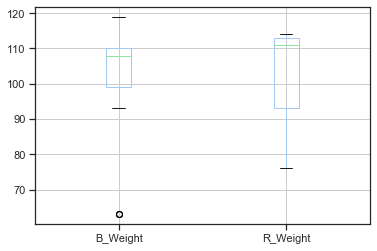

In [31]:
#box and whisker plot for weights
sns.set(style="ticks", palette="pastel")

df = pd.DataFrame(NewDataSet, columns=['B_Weight','R_Weight'])
df.plot.box(grid='True')



In [32]:
#Scatter plot for a
#ufc = pd.read_csv(os.path.join("clean.csv"))
#fig, ax = plt.subplots()
#scatter_plot = ax.scatter(
#ufc["winner"], #x values
#ufc["R_Weight"], #y values
#)
#ax.set_xlabel("")
#ax.set_ylabel("")
#ax.set_title("")
#plt.show()

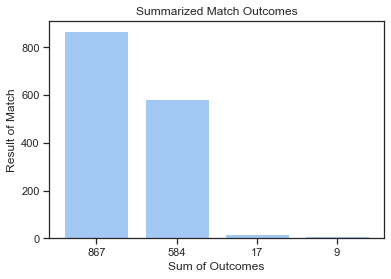

In [34]:
#bar chart showing number of red, blue winners, no contest, and draw
objects = ("Red Winner", "Blue Winner", "No Contest", "Draw")
labels = ['Red Winner', 'Blue Winner', 'No Contest', 'Draw']
results = [867,584,17,9]
labels = ['Red Winner', 'Blue Winner', 'No Contest', 'Draw']
y_pos = np.arange(len(objects))

plt.bar(y_pos, results, align='center')
plt.xticks(y_pos, results)
plt.ylabel('Result of Match')
plt.xlabel('Sum of Outcomes')
plt.title('Summarized Match Outcomes')
plt.show()

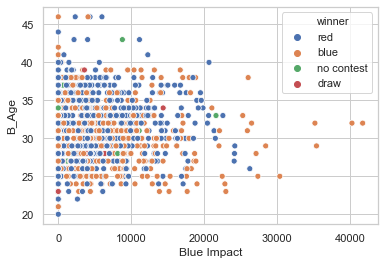

In [35]:
#Blue Scatter Plot
sns.set(style="whitegrid")
#sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))
ufc = pd.read_csv('extra_simplified.csv')
#ufc.head()
sns.scatterplot(x='Blue Impact',y='B_Age',data=ufc, hue='winner')
plt.show()

In [36]:
#HExplot code
# library & dataset
#ufc = pd.read_csv('extra_simplified.csv')
#sns.set(style="white", color_codes=True)

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x='B_Height',y='B_Age', kind='scatter')
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')
# Then you can pass arguments to each type:
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

# Custom the color
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="skyblue")

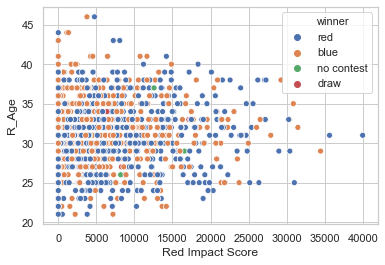

In [37]:
#Red Scatter Plot
sns.set(style="whitegrid")
#sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))
ufc = pd.read_csv('extra_simplified.csv')
#ufc.head()
sns.scatterplot(x='Red Impact Score',y='R_Age',data=ufc, hue='winner')
plt.show()

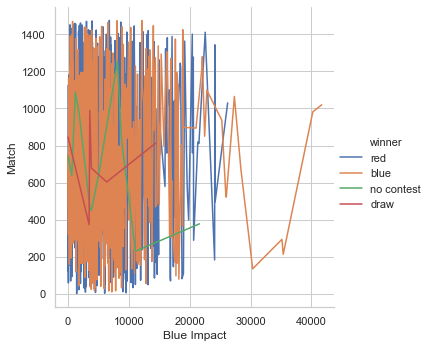

In [38]:
#statistical estimation
ufc = pd.read_csv('extra_simplified.csv')
a4_dims = (11.7,10.27)
sns.relplot(x="Blue Impact", y="Match", hue="winner", kind="line", data=ufc);

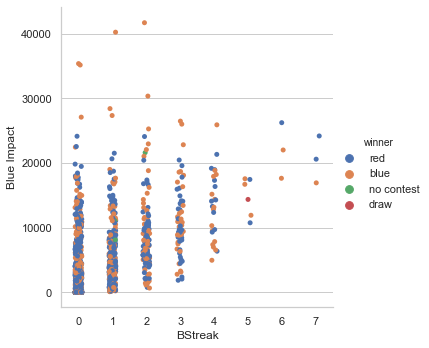

In [39]:
#Blue Catplot
ufc = pd.read_csv('extra_simplified.csv')
sns.catplot(x="BStreak", y="Blue Impact", hue="winner", data=ufc)

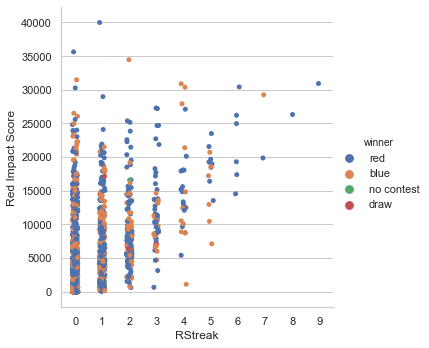

In [40]:
#Red Catplot
ufc = pd.read_csv('extra_simplified.csv')
#title('Catplot for Distribution of Red Fighters')
sns.catplot(x="RStreak", y="Red Impact Score", hue="winner", data=ufc)


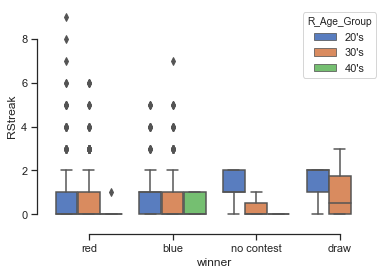

In [41]:
#Grouped box plot (Red)
sns.set(style="ticks", palette="muted")
ufc = pd.read_csv('extra_simplified.csv')
sns.boxplot(x="winner", y="RStreak", hue="R_Age_Group", data=ufc)
sns.despine(offset=10, trim=True)


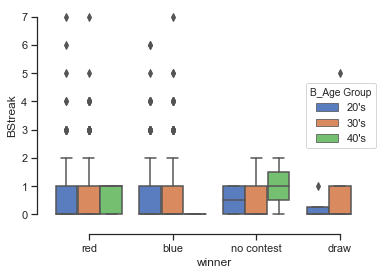

In [42]:
#Grouped box plot (Blue)
sns.set(style="ticks", palette="muted")
ufc = pd.read_csv('extra_simplified.csv')
sns.boxplot(x="winner", y="BStreak", hue="B_Age Group", data=ufc)
sns.despine(offset=10, trim=True)

In [43]:
RAge = ufc.groupby(['R_Age']).count()['R_ID']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge = pd.DataFrame(RedAge).reset_index()
RedAge

,R_Age,R_ID
0,32,169
1,30,156
2,33,141
3,28,115
4,31,113
5,29,111
6,35,92
7,34,81
8,27,78
9,37,76


In [ ]:
#box and whisker plot for age
sns.set(style="ticks", palette="pastel")

df = pd.DataFrame(AgeDataSet, columns=['B_Weight','R_Weight'])
df.plot.box(grid='True')

In [ ]:
#
bscatter_height_streak = pd.read_csv(os.path.join("clean.csv"))
df = pd.DataFrame(bscatter_height_streak, columns = ['B_Height', 'BStreak'])
print (df)

In [ ]:
bscatter_age_streak = pd.read_csv(os.path.join("clean.csv"))
df = pd.DataFrame(bscatter_age_streak, columns = ['B_Age', 'BStreak'])
print (df)

In [ ]:
#create heatmap
%matplotlib inline
df = pd.read_csv('extra_simplified.csv')

In [ ]:
df.columns
df.head()

In [ ]:
df.dtypes

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, linewidth = 0.5, cmap='Blues')